<a href="https://colab.research.google.com/github/mayakerem/SciPhyProjects/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Impact of Architecture On ANN Accuracy #

*Course: Scientific Computation with Python @ IDC*

By: Maya Kerem

August 2020


### Introduction:
    
This project will investigate the impact of an ANN architecture on the accuracy of ANN. The architecture will vary in the number of hidden layers it will have and the type of hidden layer. The types of hidden layers that will be investigated are Dense Layer, Convolutional Layers, and Pool Layers.

<center>
<img src=https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/42339i8BA3F2CCCEDE7458/image-size/medium?v=1.0&px=999 width="500">
</center>

### I. About Neural Networks:

#### Definition

**Units:**

The amount of "neurons", or "cells", or whatever the layer has inside it.

**Layers:** 

* In Keras, the input layer itself is not a layer, but a tensor. It's the starting tensor you send to the first hidden layer. This tensor must have the same shape as your training data.
* Each type of layer requires the input with a certain number of dimensions:
<center><img src=https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg width=600></center>

**Types of Hidden Layers**

1. Dense: regular deeply connected neural network layer
<center>
<img src=https://www.researchgate.net/profile/Mark_Sandler2/publication/319700841/figure/fig3/AS:538663165857797@1505438714241/An-illustration-of-a-dense-layer-that-has-a-4D-input-and-3D-output.png width=100>
</center>

2. Conv1D: convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs
<center>
    <img src = https://richliao.github.io/images/YoonKim_ConvtextClassifier.png width=150>
</center>

3. Dropout: randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. 
<center>
    <img src=https://jamesmccaffrey.files.wordpress.com/2018/05/neuralnetworkdropoutlayer.jpg?w=584&h=329 width=150>
</center>

4. Flatten: Flattens the input. Does not affect the batch size.
<center>
    <img src=https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png width=150>
</center>
    
5. MaxPooling1D: Downsamples the input representation by taking the maximum value over the window defined by pool_size. The window is shifted by strides
6. AveragePooling1D: Average Pooling layer for 1D inputs.
<center>
    <img src=https://miro.medium.com/proxy/1*AaQqX4542KI_nTSGAepXMw.png width=150>
</center>
7. Batch Normalization: This layer normalizes and scales inputs or activations. Should lead to faster learning rates and allows for each layer to learn the training data indepedently of the other layers.



**Input Shape:**
The input shape is the only one you must define, because your model cannot know it. Only you know that, based on your training data.

**Units**
The "units" of each layer will define the output shape (the shape of the tensor that is produced by the layer and that will be the input of the next layer).

Each type of layer works in a particular way. Dense layers have output shape based on "units", convolutional layers have output shape based on "filters". But it's always based on some layer property. (See the documentation for what each layer outputs)

**Weights:**
Weights will be entirely automatically calculated based on the input and the output shapes. Again, each type of layer works in a certain way. But the weights will be a matrix capable of transforming the input shape into the output shape by some mathematical operation.
* In a dense layer, weights multiply all inputs. It's a matrix with one column per input and one row per unit, but this is often not important for basic works.

####Library Imports

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import bernoulli as ber
from scipy.stats import uniform as uni
import seaborn as sns
sns.set_context('notebook')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.utils import resample

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, BatchNormalization
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings("ignore")

### II. Data:
The data used in this analysis is the a dataset based on ​Churn Data.​ In later iterations alter the data inorder to see if that assits accuracy measurments.

In [25]:
# If I want to upload data from local computer

# from google.colab import files
# uploaded = files.upload()

Loading data from github folder

In [127]:
df = pd.read_csv("https://raw.githubusercontent.com/mayakerem/DataFiles/master/Churn_Modelling.csv")

In [128]:
print("This data originally contains {} attributes, including the target".format(len(df.columns)))
df

This data originally contains 14 attributes, including the target


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### III. EDA

We will preform EDA (Exploratory Data Analysis) inorder to familiarise ourselves with the data and better prepare it for building a Neural Network

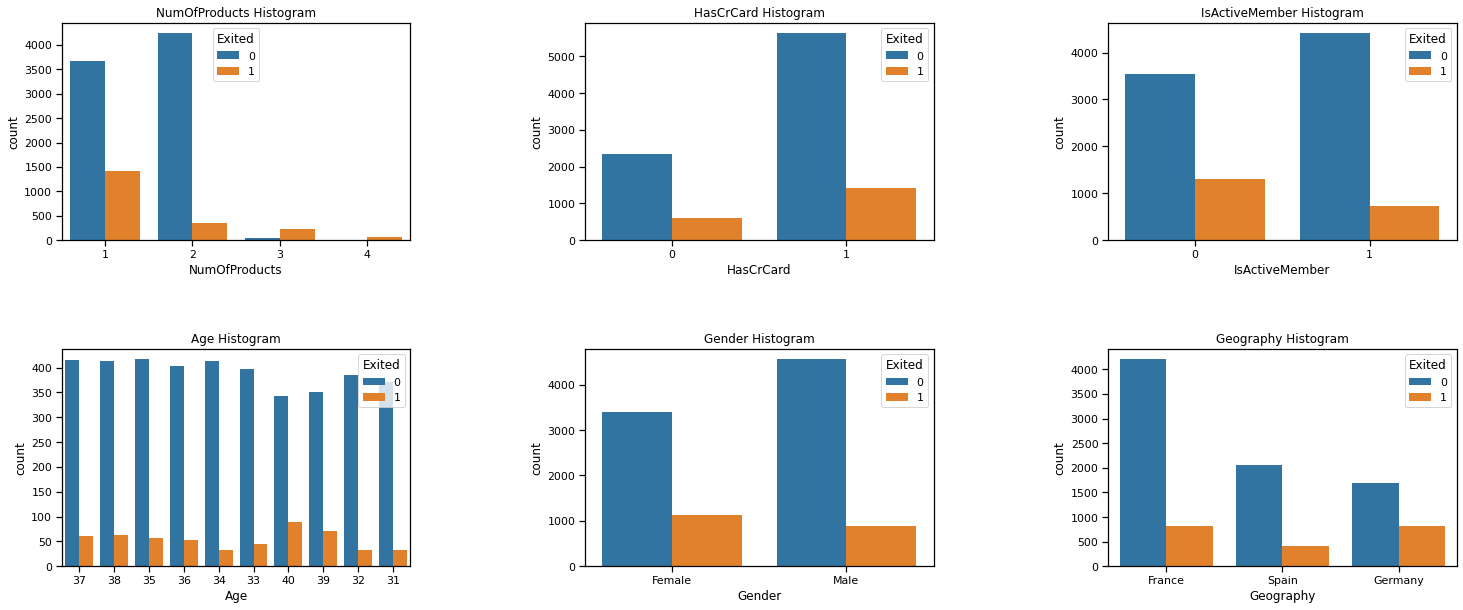

In [28]:
_, ax = plt.subplots(2, 3, figsize=(25, 10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0][0])
ax[0][0].set_title('NumOfProducts Histogram')
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[0][1])
ax[0][1].set_title('HasCrCard Histogram')
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[0][2])
ax[0][2].set_title('IsActiveMember Histogram')

# Split into 10 Buckets
sns.countplot(x = "Age", hue="Exited", data = df, ax = ax[1][0],order = df.Age.value_counts().iloc[:10].index)
ax[1][0].set_title('Age Histogram')
sns.countplot(x = "Gender", hue="Exited", data = df, ax = ax[1][1])
ax[1][1].set_title('Gender Histogram')
sns.countplot(x = "Geography", hue="Exited", data = df, ax = ax[1][2])
ax[1][2].set_title('Geography Histogram')
plt.show()

We can already see from the above that probability can naively predict the answer at an acuracy of ~80%

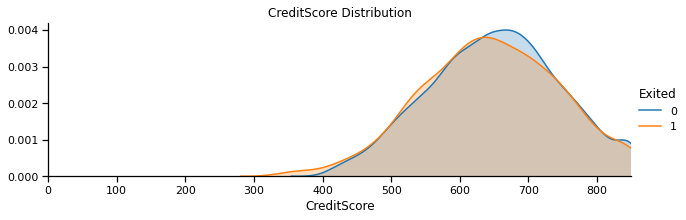

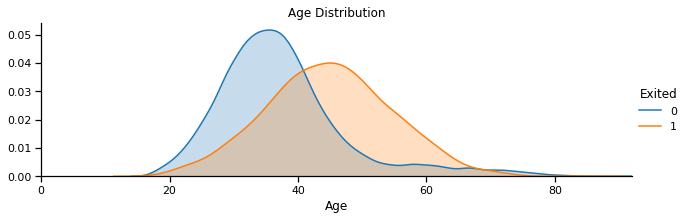

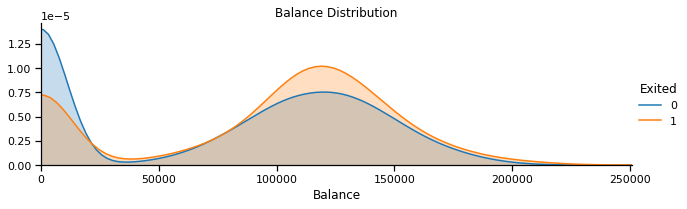

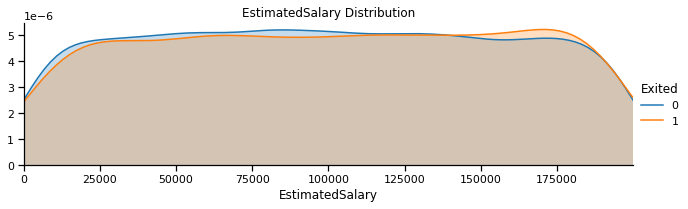

In [29]:
def facegrid(feature):
    facet = sns.FacetGrid(df, hue="Exited",aspect=3)
    facet.map(sns.kdeplot,feature,shade= True)
    facet.set(xlim=(0, df[feature].max()))
    facet.add_legend()
    plt.title('{} Distribution'.format(feature))
    plt.show()
    
facegrid("CreditScore")
facegrid("Age")
facegrid("Balance")
facegrid("EstimatedSalary")

### IIV. Neural Network Models

#### General

The models and methods that will be applied are going to based on the Keras library. 

The model will be made of the Keras ​Sequential object. Then a model summary will be composed for each ANN. The model will then be compiled and fit the data. Lastly, the effectiveness of the architecture will be examined by​ model.evalaute ​method.

The layers we will use are: Dense layer, Dropout and Batch Normailzation.

Layers such as Conv1D, MaxPooling or AveragePooling cannot be used here, we dont assume that there is a relationship between layers that is dependent on their order.

In [129]:
# Data columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


As we are working with Neural Networks, we will need to ensure all data types are numerical and that we are only dealing with relevant columns/features. 
Notice that RowNumber or Surname or CustomerId are not relevant column/feature in the context of Churn

In [31]:
#Get Dummies
df.columns
# Removing columns that are irrelevant
df = df.drop(['RowNumber', 'CustomerId','Surname'],axis=1)
df = pd.get_dummies(df)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


Next, we normalize all the data

In [32]:
norm_df = (df-df.min())/(df.max()-df.min())
original_norm_df = norm_df.copy() # for third iteration of the data we will need to keep a dataset that is not upsampled
# Testing not normalized data
# norm_df=df

In [33]:
print(norm_df.shape)
norm_df

(10000, 14)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,1.0,0.0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,1.0,0.0,0.0,1.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0,0.0,0.0,1.0


And we verify that we only have numerical values in our dataset

In [34]:
# Data columns type
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  float64
 9   Geography_France   10000 non-null  float64
 10  Geography_Germany  10000 non-null  float64
 11  Geography_Spain    10000 non-null  float64
 12  Gender_Female      10000 non-null  float64
 13  Gender_Male        10000 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


In [35]:
norm_df['Exited'].value_counts()

0.0    7963
1.0    2037
Name: Exited, dtype: int64

Next we need to balance the data. The naive prediction will predict with ~80% accuracy. We will balance the data using upsampling!

In [36]:
norm_df_minority_upsampled = resample(norm_df[norm_df.Exited==1], 
                                 replace=True,     
                                 n_samples=7900,   
                                 random_state=12) 
 
# Combine majority class with upsampled minority class
norm_df_upsampled = pd.concat([norm_df[norm_df.Exited==0], norm_df_minority_upsampled])
 
df = norm_df_upsampled
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0
6,0.944,0.432432,0.7,0.000000,0.333333,1.0,1.0,0.050261,0.0,1.0,0.0,0.0,0.0,1.0
8,0.302,0.351351,0.4,0.566170,0.333333,0.0,1.0,0.374680,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.934,0.500000,1.0,0.468563,0.000000,1.0,0.0,0.479696,1.0,1.0,0.0,0.0,1.0,0.0
2945,0.970,0.027027,0.4,0.495681,0.000000,0.0,0.0,0.901017,1.0,0.0,1.0,0.0,0.0,1.0
9577,0.982,0.459459,0.3,0.447923,0.000000,1.0,0.0,0.427565,1.0,0.0,1.0,0.0,1.0,0.0
7219,0.462,0.486486,0.4,0.355921,0.000000,0.0,0.0,0.027737,1.0,1.0,0.0,0.0,0.0,1.0


In [37]:
# Display new class counts
norm_df_upsampled.Exited.value_counts()

0.0    7963
1.0    7900
Name: Exited, dtype: int64

In [38]:
norm_df = norm_df_upsampled

Now we will split the data into testing and training groups

In [39]:
# Removing Target column from X
norm_df_feature = norm_df.drop(['Exited'],axis=1)
norm_df_target = norm_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(norm_df_feature, norm_df_target, test_size=0.3, random_state=33)

print(X_train.shape, y_train.shape)
print(X_train, y_train)

(11104, 13) (11104,)
      CreditScore       Age  ...  Gender_Female  Gender_Male
3719        1.000  0.594595  ...            1.0          0.0
8918        0.582  0.459459  ...            1.0          0.0
1388        0.560  0.297297  ...            1.0          0.0
1782        0.408  0.229730  ...            1.0          0.0
514         0.510  0.445946  ...            1.0          0.0
...           ...       ...  ...            ...          ...
5004        0.304  0.527027  ...            1.0          0.0
727         0.722  0.094595  ...            1.0          0.0
7367        0.512  0.324324  ...            0.0          1.0
3080        0.236  0.135135  ...            0.0          1.0
9058        0.240  0.405405  ...            1.0          0.0

[11104 rows x 13 columns] 3719    1.0
8918    1.0
1388    1.0
1782    1.0
514     1.0
       ... 
5004    1.0
727     0.0
7367    0.0
3080    0.0
9058    0.0
Name: Exited, Length: 11104, dtype: float64


In [40]:
nsamples, nfeatures = X_train.shape
nclass = 2 # Output classe
nnepoch = 30
ntimesteps = X_train.shape[1]

ncats = norm_df_target.value_counts().size

print("nsamples = {}, nfeatures = {}, ntimesteps = {}, ncats = {}, nnepoch = {}".format(nsamples,nfeatures,ntimesteps,ncats,nnepoch))

nsamples = 11104, nfeatures = 13, ntimesteps = 13, ncats = 2, nnepoch = 30


In [41]:
y_train = keras.utils.to_categorical(y_train, ncats)
y_test = keras.utils.to_categorical(y_test, ncats)

In [42]:
def train_model(model_name):
    #To visualize neural network
    # model_name.summary()
    model_name.compile(
        loss='binary_crossentropy',           
        optimizer='adam',
        metrics=['accuracy'])
    # Training the NN
    history = model_name.fit(X_train, 
                        y_train,
                        epochs=nnepoch, 
                        batch_size=100,
                        validation_data=(X_test, y_test),
                        verbose = 0 # Dont print iterations
                       )
    return history


def evaluate_model(model_name):
    ### score trained model
    _, acc_test = model_name.evaluate(X_test, y_test, verbose=0) # Dont print iterations
    return acc_test

#### Iteration 1: Generating Models based on Given Data

In [43]:
def create_model(block_mode, layers):
  # model FFN
  model = Sequential()
  model.add(InputLayer(nfeatures))
  
  # blocks
  for b in block_mode:
    if b == "Dense":
      for l in layers:
        model.add(Dense(l,activation='relu'))
    if b == "DenseDropout":
      for l in layers:
        model.add(Dense(l,activation='relu'))
        model.add(Dropout(0.5))       
    if b == "DenseBatchDropout":
      for l in layers:
        model.add(Dense(l,activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

  # final layer - classification layer
  model.add(Dense(2,activation='sigmoid'))

  return model


In [44]:
layers_arr = [[16],
                [16,6],
                [16,8,6,4],
                # [8,16,4,6],
                [8,16,6,12,4]
                ]

blocks_arr = [["Dense"],
                # ["DenseDropout"],
                ["DenseBatchDropout"],
                ["Dense","DenseDropout"],
                # ["DenseDropout","Dense"],
                ["DenseBatchDropout","DenseDropout"],
                ["Dense","DenseDropout","DenseBatchDropout"],
                # ["Dense","DenseBatchDropout","DenseDropout"]                
                ]

In [45]:
def generate_models(layers,blocks):
  models = []
  # train_accur = []
  test_accur = []
  hist = []
  model_params = []
  for b in blocks:
    for l in layers:
      m = create_model(b,l)
      models.append(m)
      h = train_model(m)
      hist.append(h)
      test_accur.append(evaluate_model(m))
      # train_accur.append(h['accuracy'])
      model_params.append((b,l))
  return (models, test_accur, hist, model_params)

In [46]:
%%time

models, accur, hist, mo_param = generate_models(layers_arr,blocks_arr)

CPU times: user 5min 47s, sys: 30.9 s, total: 6min 17s
Wall time: 4min 39s


### V. Accuracy Evaluation

In [47]:
def accuracy_graphs(model_history,model_paramaters):
  for h,mp in zip(model_history,model_paramaters):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy {}'.format(mp))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

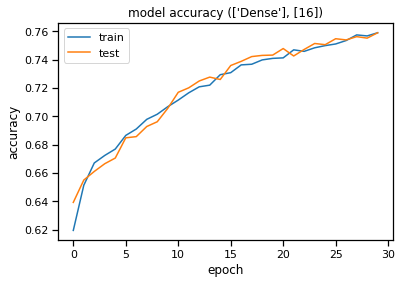

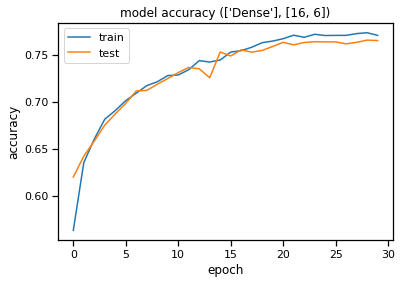

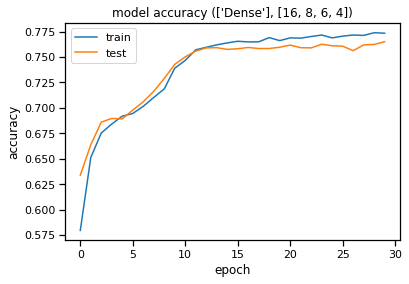

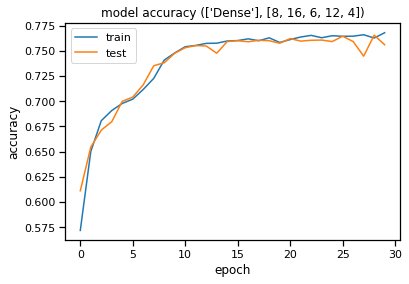

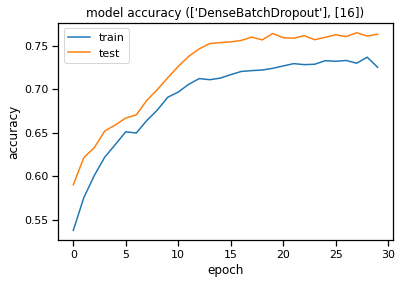

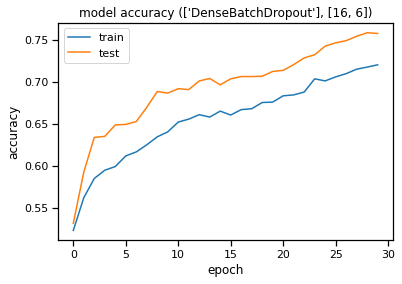

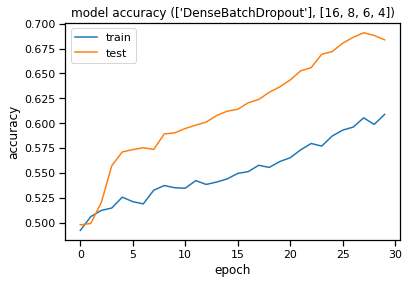

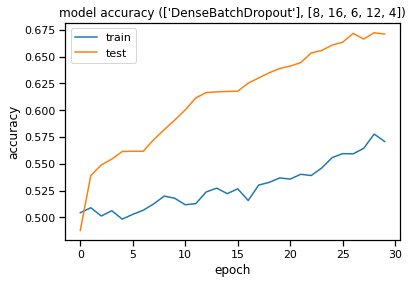

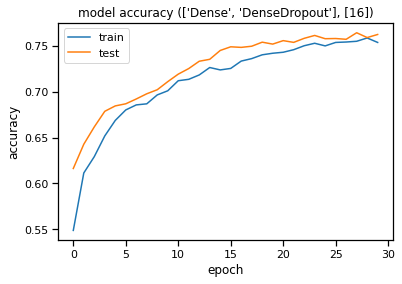

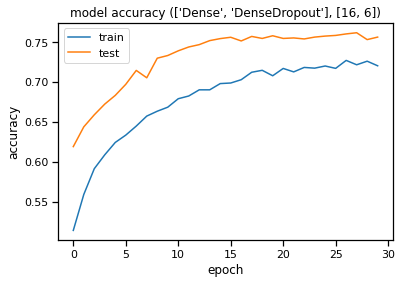

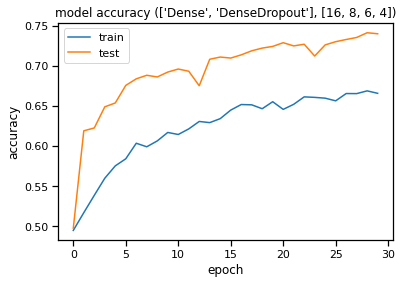

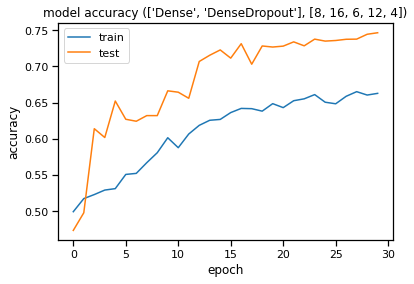

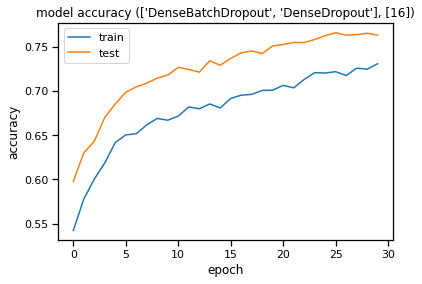

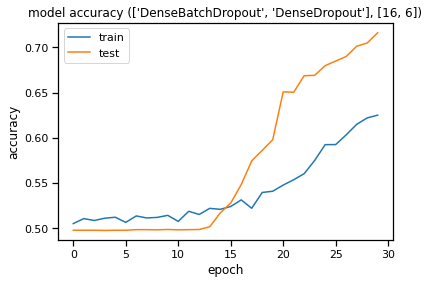

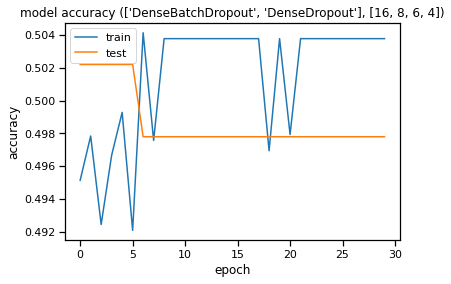

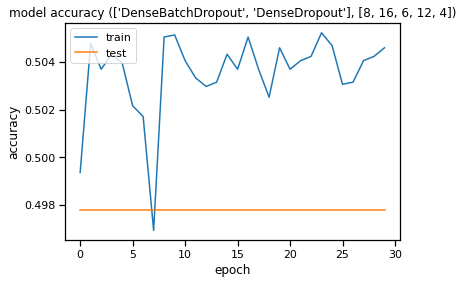

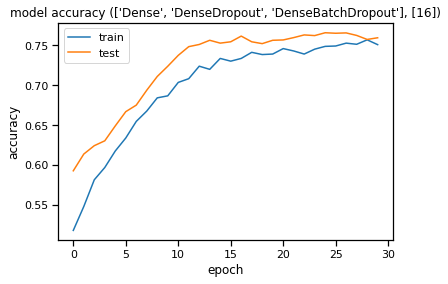

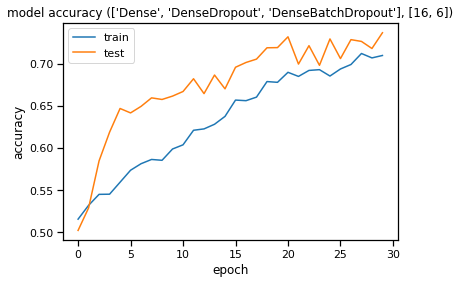

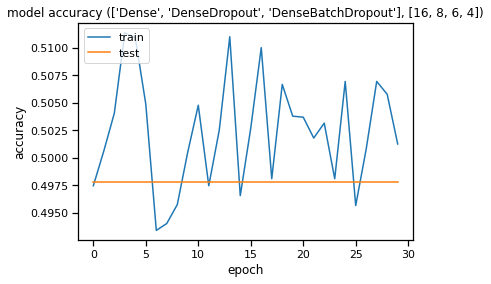

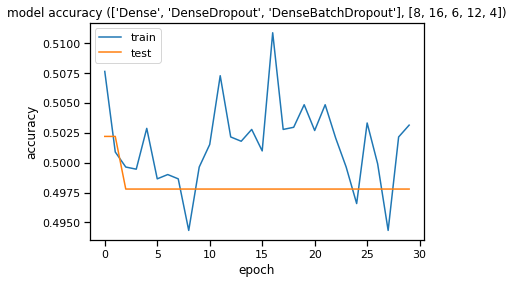

In [48]:
accuracy_graphs(hist, mo_param)

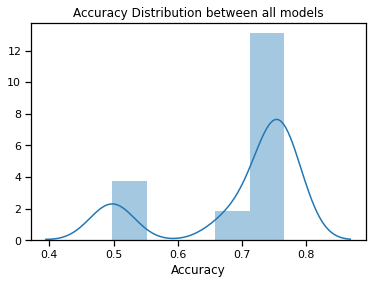

In [49]:
sns.distplot(accur)
plt.title('Accuracy Distribution between all models')
plt.xlabel('Accuracy')
plt.show()

We will now create a filter were we remove models that 

In [50]:
def get_filter_good_models(df, hist,accur, mo_params, epsilon = 0.15):
  filter_in_models = []
  # Naive Case
  treshold = (len(df[df.Exited==0])/df.shape[0])

  for h,ac,mp in zip(hist,accur, mo_param):
    # If better than naive case, keep it
    if ac > treshold + epsilon:
      filter_in_models.append(mp)

  print("We will keep {} models".format(len(filter_in_models)))
  return filter_in_models

In [51]:
filter = get_filter_good_models(norm_df, hist,accur, mo_param)

We will keep 16 models


In [54]:
def filter_model(filter,models,accur,hist,mo_param):  
  filter_index = []
  for mp in filter:
    filter_index.append(mo_param.index(mp))
    
  # updating list
  models = [models[index] for index in filter_index]
  accur = [accur[index] for index in filter_index]
  hist = [hist[index] for index in filter_index]
  mo_param = [mo_param[index] for index in filter_index]

  # Validation Test
  print(len(models),models)
  print(len(accur),accur)
  print(len(hist),hist)
  print(len(mo_param),mo_param)

  return(models,accur,hist,mo_param)

In [55]:
models, accur, hist, mo_param = filter_model(filter,models,accur,hist,mo_param)

16 [<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9428edccf8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94284ef4e0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94274b3160>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9428fa7048>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94300d0ef0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94284df710>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9428fb0e80>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94258817b8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9420b0ccc0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f949fe67f98>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9428e15860>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f941d4aecc0>, <tensorflow.python.keras

In [56]:
final_model = []

In [57]:
def display_best_model(accur,models,mo_param,final_models,title):
  accur_arr = np.array(accur) 
  index_max = np.argmax(accur_arr)
  print("The most accurate model is {} with accuracy of {:.3f}".format(mo_param[index_max], accur[index_max]))
  final_models.append(title)
  final_models.append(models[index_max])
  return(plot_model(models[index_max], show_shapes=True, show_layer_names=False))

The most accurate model is (['Dense'], [16, 6]) with accuracy of 0.765


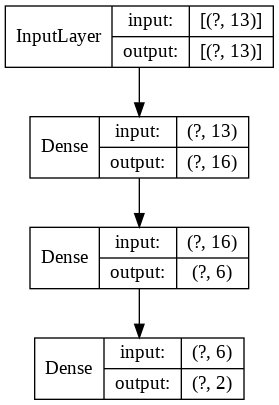

In [58]:
display_best_model(accur, models,mo_param,final_model,"Iteration 1")

### VI. Feature Engineering

In [69]:
fe_df = norm_df.copy()
fe_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0
6,0.944,0.432432,0.7,0.000000,0.333333,1.0,1.0,0.050261,0.0,1.0,0.0,0.0,0.0,1.0
8,0.302,0.351351,0.4,0.566170,0.333333,0.0,1.0,0.374680,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.934,0.500000,1.0,0.468563,0.000000,1.0,0.0,0.479696,1.0,1.0,0.0,0.0,1.0,0.0
2945,0.970,0.027027,0.4,0.495681,0.000000,0.0,0.0,0.901017,1.0,0.0,1.0,0.0,0.0,1.0
9577,0.982,0.459459,0.3,0.447923,0.000000,1.0,0.0,0.427565,1.0,0.0,1.0,0.0,1.0,0.0
7219,0.462,0.486486,0.4,0.355921,0.000000,0.0,0.0,0.027737,1.0,1.0,0.0,0.0,0.0,1.0


In [70]:
cs = fe_df["CreditScore"]
es = fe_df["EstimatedSalary"]
bl = fe_df["Balance"]

In [71]:
fe_df["cs^2+es^2"] = (cs * cs) + (es * es)
fe_df["es^2+bs^2"] = (es * es) + (bl * bl)
fe_df["bs*es"] = (bl*es)

In [72]:
# Split Data again

# Removing Target column from X
fe_df_feature = fe_df.drop(['Exited'],axis=1)
fe_df_target = fe_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(fe_df_feature, fe_df_target, test_size=0.3, random_state=33)

print(X_train.shape, y_train.shape)
print(X_train, y_train)

(11104, 16) (11104,)
      CreditScore       Age  Tenure  ...  cs^2+es^2  es^2+bs^2     bs*es
3719        1.000  0.594595     0.1  ...   1.125710   0.372648  0.176189
8918        0.582  0.459459     0.4  ...   0.545575   0.206851  0.000000
1388        0.560  0.297297     0.0  ...   0.403680   0.313652  0.141913
1782        0.408  0.229730     0.6  ...   0.393396   0.447027  0.223487
514         0.510  0.445946     0.3  ...   0.372678   0.407216  0.182126
...           ...       ...     ...  ...        ...        ...       ...
5004        0.304  0.527027     0.3  ...   0.139855   0.210985  0.088082
727         0.722  0.094595     0.7  ...   0.523621   0.002337  0.000000
7367        0.512  0.324324     1.0  ...   1.053745   0.791601  0.000000
3080        0.236  0.135135     0.3  ...   0.783866   0.728170  0.000000
9058        0.240  0.405405     0.6  ...   0.399653   0.655980  0.327688

[11104 rows x 16 columns] 3719    1.0
8918    1.0
1388    1.0
1782    1.0
514     1.0
       ... 
5004

In [73]:
nsamples, nfeatures = X_train.shape
nclass = 2 # Output classe
nnepoch = 25
ntimesteps = X_train.shape[1]

ncats = norm_df_target.value_counts().size

print("nsamples = {}, nfeatures = {}, ntimesteps = {}, ncats = {}, nnepoch = {}".format(nsamples,nfeatures,ntimesteps,ncats,nnepoch))

y_train = keras.utils.to_categorical(y_train, ncats)
y_test = keras.utils.to_categorical(y_test, ncats)

nsamples = 11104, nfeatures = 16, ntimesteps = 16, ncats = 2, nnepoch = 25


#### Iteration 2: Generating Modesl based on Extended Data

We will attempt an optimization where we assume that some features have non linear relationship. We add these relationships as new features and we will run our models again on this new dataset

In [74]:
%%time

# Generate new models
models, accur, hist, mo_param = generate_models(layers_arr,blocks_arr)

CPU times: user 4min 52s, sys: 25.8 s, total: 5min 18s
Wall time: 3min 56s


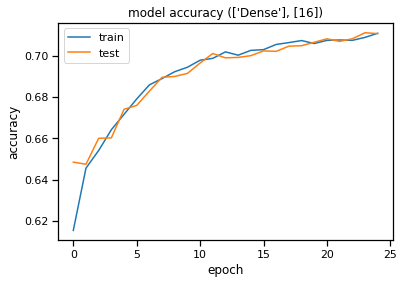

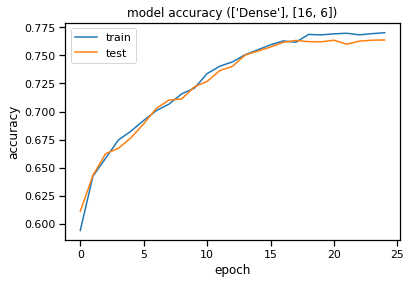

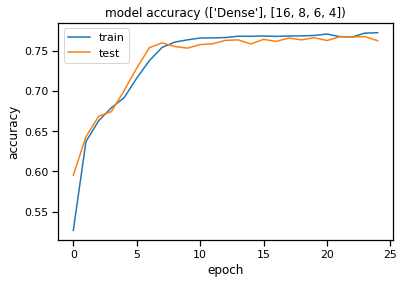

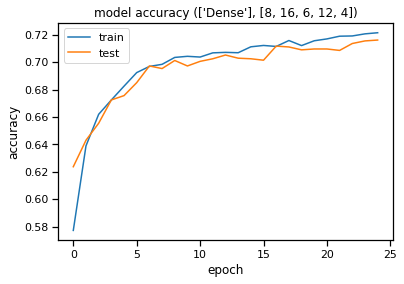

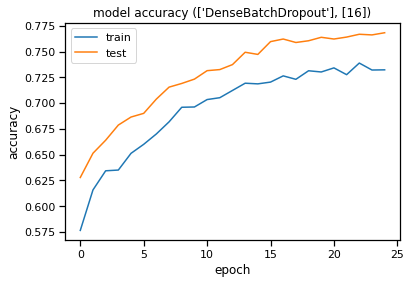

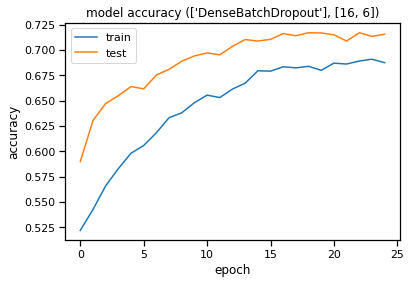

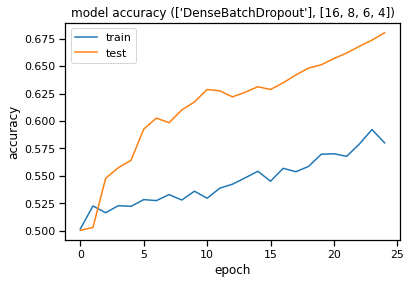

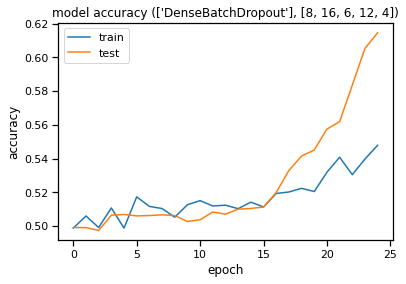

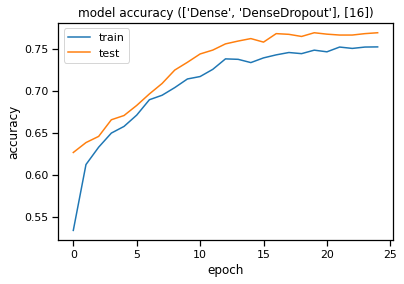

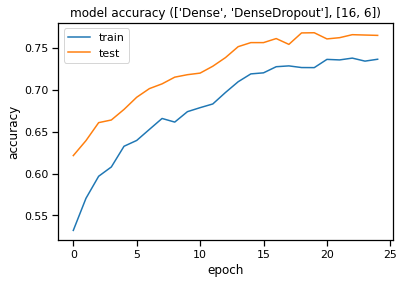

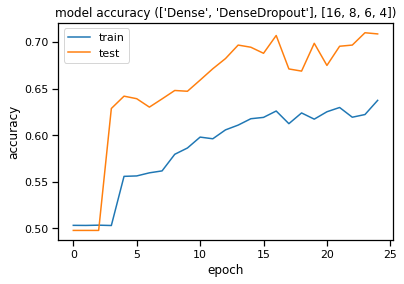

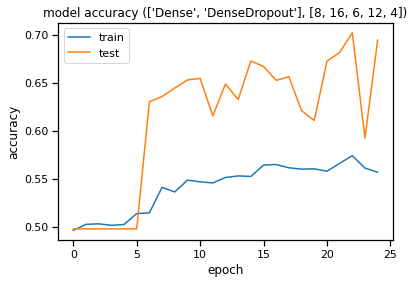

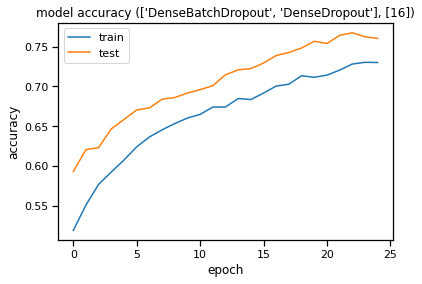

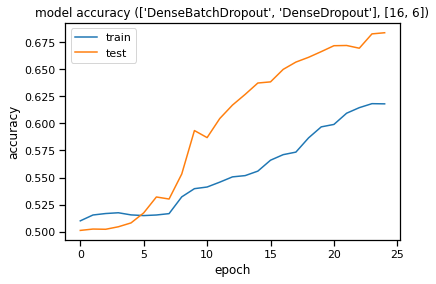

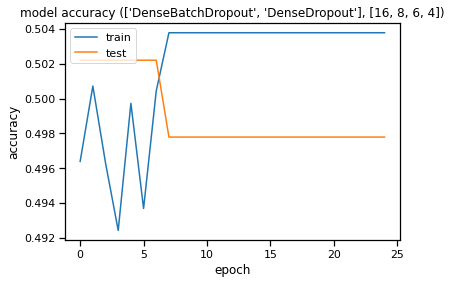

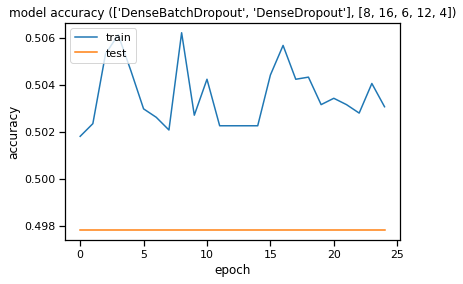

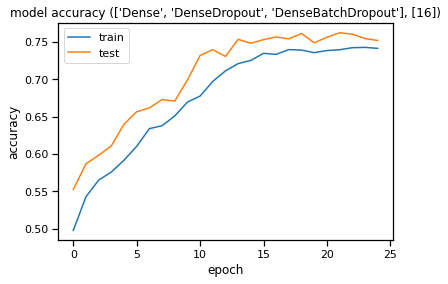

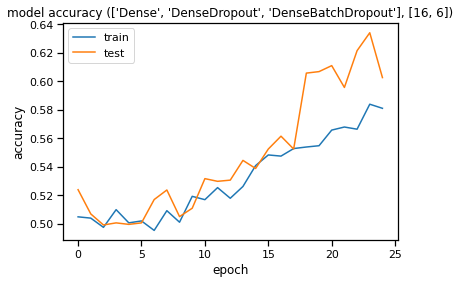

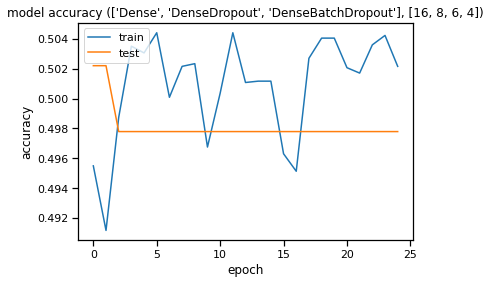

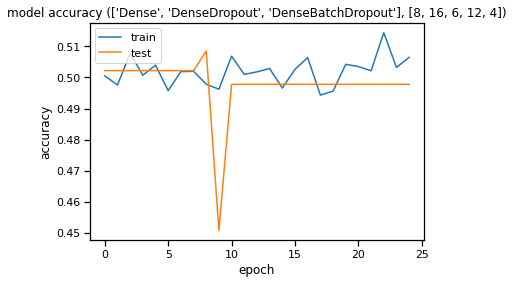

In [75]:
# Generate accuracy graphs
accuracy_graphs(hist, mo_param)

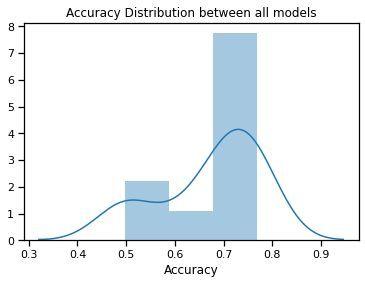

In [76]:
sns.distplot(accur)
plt.title('Accuracy Distribution between all models')
plt.xlabel('Accuracy')
plt.show()

We will keep 14 models
14 [<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93ff0771d0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93ff108630>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93fe6666d8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93fe5b6358>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93fe432b00>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93fe0efeb8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93fe0a4c18>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9406da7320>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9410876d30>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93ff21ac88>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93ff2cf9e8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9410d72208>, <

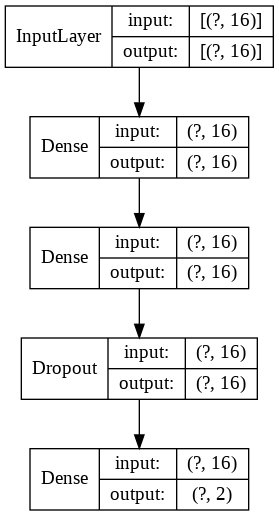

In [77]:
filter = get_filter_good_models(norm_df, hist,accur, mo_param)
models, accur, hist, mo_param = filter_model(filter,models,accur,hist,mo_param)
display_best_model(accur, models,mo_param,final_model,"Iteration 2")

We get the same optimal model as before, hence this iteration did not help

### VII. Instance Sampling

In the next part we will increase our data set based on distribution assumtions for each feature.

In [78]:
original_norm_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,1.0,0.0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,1.0,0.0,0.0,1.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0,0.0,0.0,1.0


In [79]:
cs = original_norm_df["CreditScore"]
es = original_norm_df["EstimatedSalary"]
bl = original_norm_df["Balance"]
original_norm_df["cs^2+es^2"] = (cs * cs) + (es * es)
original_norm_df["es^2+bs^2"] = (es * es) + (bl * bl)
original_norm_df["bs*es"] = (bl*es)

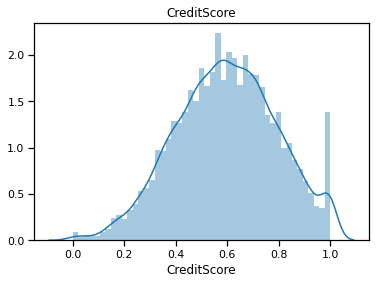

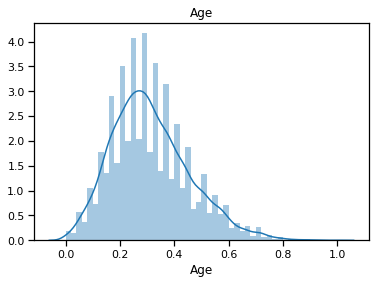

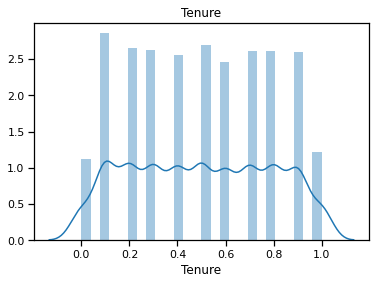

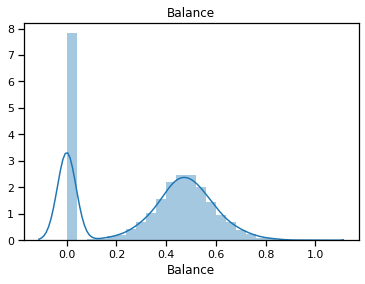

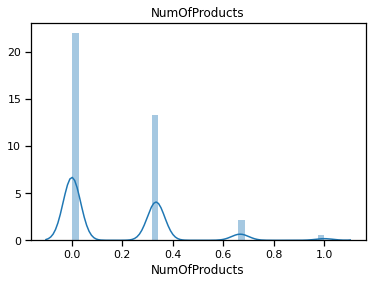

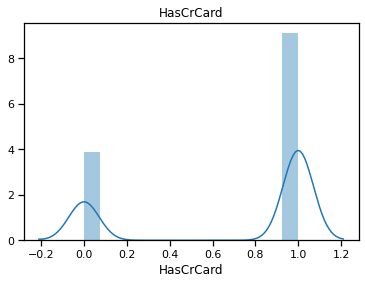

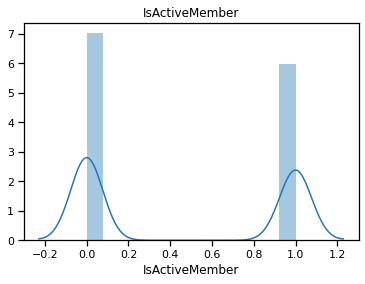

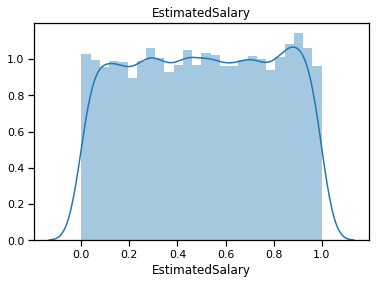

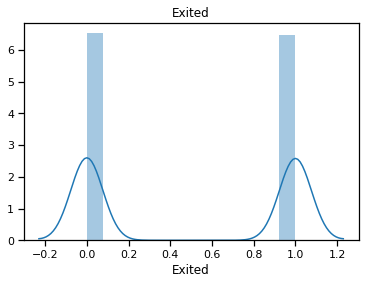

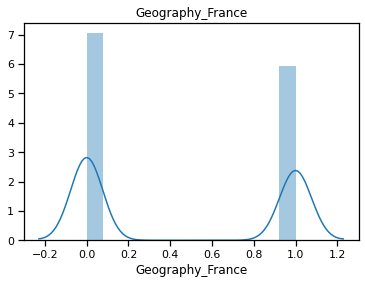

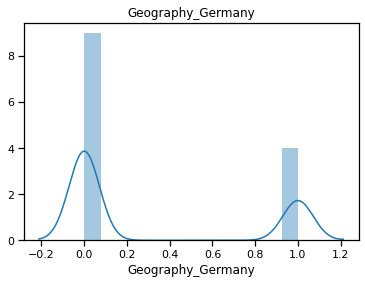

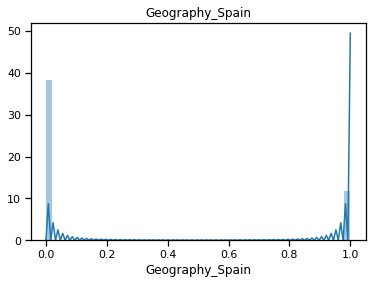

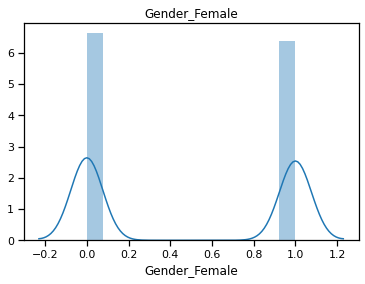

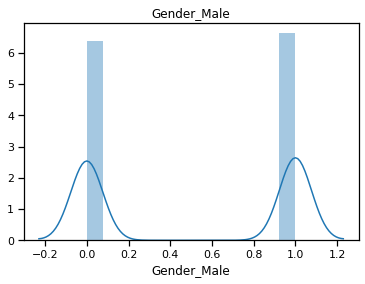

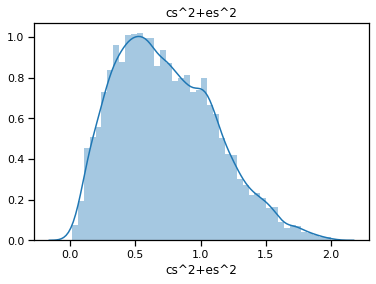

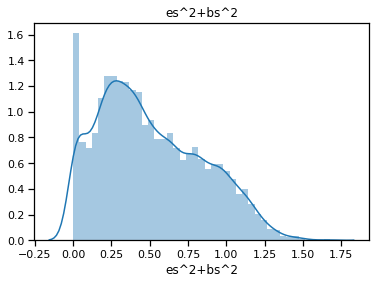

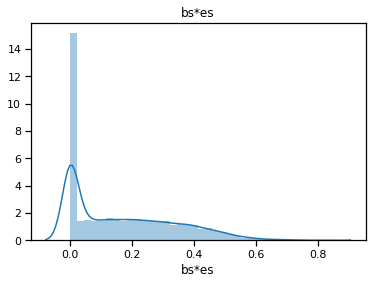

In [80]:
for f in original_norm_df.columns:
  gr = sns.distplot(fe_df[f])
  plt.title(f)
  plt.show()

In [81]:
total_samples = original_norm_df.shape[0]

guassian_features = ['CreditScore', 
                     'Age', 
                     'Balance',
                     'NumOfProducts',
                     'cs^2+es^2', 
                     'es^2+bs^2', 
                     'bs*es']

bernoulli_features = ['HasCrCard',
                      'IsActiveMember',
                      'Exited', 
                      'Geography_France',
                      'Geography_Germany', 
                      'Geography_Spain', 
                      'Gender_Female', 
                      'Gender_Male']

bernoulli_prob = [len(original_norm_df[original_norm_df[bernoulli_features[0]] == 1])/total_samples,
                  len(original_norm_df[original_norm_df[bernoulli_features[1]] == 1])/total_samples,
                  len(original_norm_df[original_norm_df[bernoulli_features[2]] == 1])/total_samples,
                  len(original_norm_df[original_norm_df[bernoulli_features[3]] == 1])/total_samples,
                  len(original_norm_df[original_norm_df[bernoulli_features[4]] == 1])/total_samples,
                  len(original_norm_df[original_norm_df[bernoulli_features[5]] == 1])/total_samples,
                  len(original_norm_df[original_norm_df[bernoulli_features[6]] == 1])/total_samples,
                  len(original_norm_df[original_norm_df[bernoulli_features[7]] == 1])/total_samples
                  ]
uniform_features = ['Tenure',
                    'EstimatedSalary']

uniform_mean = [original_norm_df[uniform_features[0]].mean(),
                original_norm_df[uniform_features[1]].mean()
                ]
uniform_std = [original_norm_df[uniform_features[0]].std(),
               original_norm_df[uniform_features[1]].std()
               ]

In [82]:
def generate_samples(original_df, target_df, num_samples):
  for f in original_df.columns:
    # print(f)
    if f in guassian_features:
      kde = scipy.stats.gaussian_kde(original_df[f])
      data_kde_gaus = kde.resample(num_samples)
      target_df[f] = data_kde_gaus[0]
    if f in bernoulli_features:
      index = bernoulli_features.index(f)
      # print('index {}'.format(index))
      data_bern = ber.rvs(size=num_samples,p=bernoulli_prob[index])
      target_df[f] = data_bern
    if f in uniform_features:
      index = uniform_features.index(f)
      mean = uniform_mean[index] #loc
      std = uniform_std[index] #scale
      data_uni = uni.rvs(loc = mean, scale = std, size=num_samples)
      target_df[f] = data_uni

In [83]:
new_sample_data = pd.DataFrame(columns=original_norm_df.columns)
new_sample_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,cs^2+es^2,es^2+bs^2,bs*es


In [84]:
generate_samples(original_norm_df, new_sample_data, 500000)

In [85]:
new_sample_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,cs^2+es^2,es^2+bs^2,bs*es
0,0.566557,0.177823,0.729372,-0.005430,0.348363,1,0,0.540035,0,1,0,0,1,0,0.286770,-0.047201,0.092236
1,0.675030,0.248433,0.644813,-0.010307,-0.006303,1,1,0.771760,0,1,0,1,0,1,1.033970,0.393407,0.155977
2,0.525349,0.052370,0.633195,0.506268,0.392916,0,0,0.638143,1,0,1,0,1,0,0.605196,0.144706,-0.004068
3,0.691081,0.313764,0.635072,0.707800,0.300015,1,0,0.531753,0,0,1,0,1,1,0.299256,0.315352,0.489812
4,0.407646,0.321459,0.606558,0.682774,0.331312,1,0,0.624310,0,1,0,0,0,0,0.802698,0.389704,0.006602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.398437,0.162470,0.690478,0.033076,-0.029255,1,0,0.572871,0,1,1,0,0,0,1.036639,0.550466,-0.003469
499996,0.715534,0.468207,0.603141,0.001137,0.325544,1,0,0.530222,0,1,1,0,1,0,0.869791,1.202220,0.062194
499997,0.757442,0.296806,0.696515,0.441150,0.064785,1,0,0.715897,0,0,0,0,0,1,0.276330,0.800226,-0.006505
499998,0.716798,0.361929,0.604172,-0.030638,0.326110,0,0,0.749637,0,1,0,0,0,1,1.101035,0.775185,0.114702


In [86]:
# Split Data again

# Removing Target column from X
new_sample_data_feature = new_sample_data.drop(['Exited'],axis=1)
new_sample_data_target = new_sample_data['Exited']

X_train, X_test, y_train, y_test = train_test_split(new_sample_data_feature, new_sample_data_target, test_size=0.3, random_state=33)

print(X_train.shape, y_train.shape)
print(X_train, y_train)

(350000, 16) (350000,)
        CreditScore       Age    Tenure  ...  cs^2+es^2  es^2+bs^2     bs*es
304262     0.421516  0.180480  0.759219  ...   0.359720   0.712676  0.012797
435971     0.889149  0.335973  0.674774  ...   0.343998   0.813732  0.080809
162870     0.382932  0.591738  0.515929  ...   1.270636   0.402683  0.207562
281851     0.319475  0.165100  0.727830  ...   0.301173  -0.031202  0.030615
158598     0.767417  0.259855  0.544808  ...   0.792135   0.172507  0.005968
...             ...       ...       ...  ...        ...        ...       ...
223890     0.287585  0.448007  0.682418  ...   0.643131   0.233026  0.018744
393794     0.990367  0.125192  0.634854  ...   0.843526   0.572279  0.086849
104152     0.483520  0.331243  0.743312  ...   0.815708   0.775175 -0.035059
461191     0.890920  0.315670  0.535497  ...   0.545805   0.416886  0.233206
416788     0.664566  0.252858  0.524895  ...   0.174734   0.403475  0.611328

[350000 rows x 16 columns] 304262    0
435971    0
1

In [87]:
nsamples, nfeatures = X_train.shape
nclass = 2 # Output classe
nnepoch = 45
ntimesteps = X_train.shape[1]

ncats = norm_df_target.value_counts().size

print("nsamples = {}, nfeatures = {}, ntimesteps = {}, ncats = {}, nnepoch = {}".format(nsamples,nfeatures,ntimesteps,ncats,nnepoch))

nsamples = 350000, nfeatures = 16, ntimesteps = 16, ncats = 2, nnepoch = 45


In [88]:
y_train = keras.utils.to_categorical(y_train, ncats)
y_test = keras.utils.to_categorical(y_test, ncats)

#### Iteration 3: Generating Models based on Generated Data Samples

In [89]:
%%time

# Generate new models
models, accur, hist, mo_param = generate_models(layers_arr,blocks_arr)

CPU times: user 2h 38min 57s, sys: 11min 26s, total: 2h 50min 23s
Wall time: 2h 19min 12s


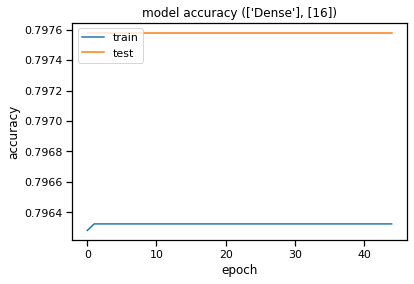

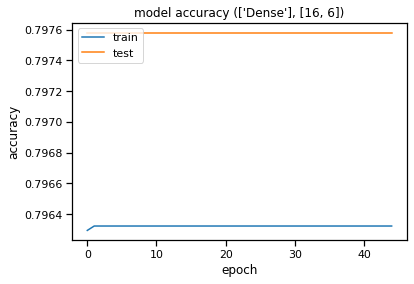

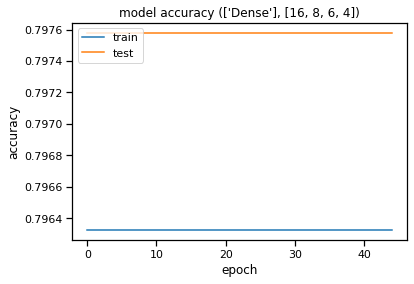

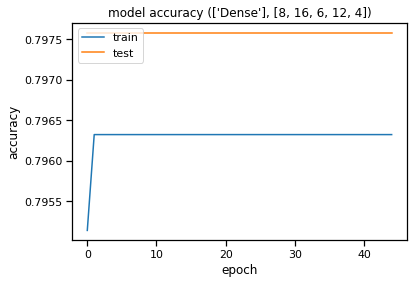

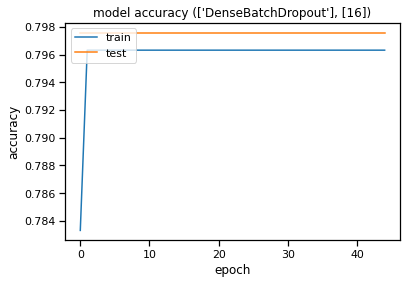

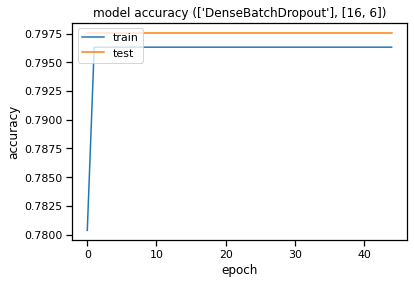

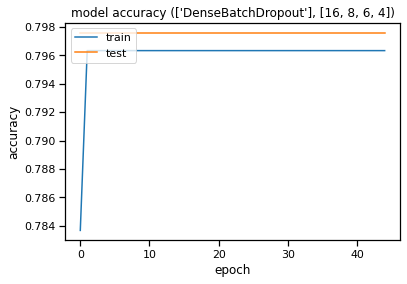

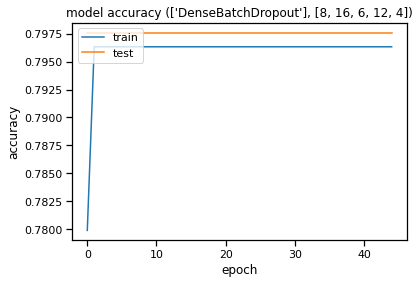

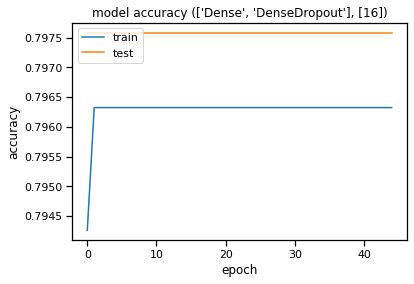

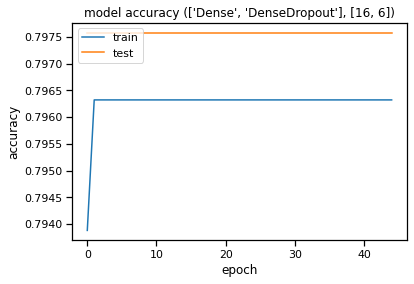

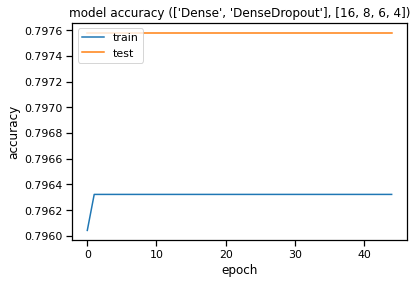

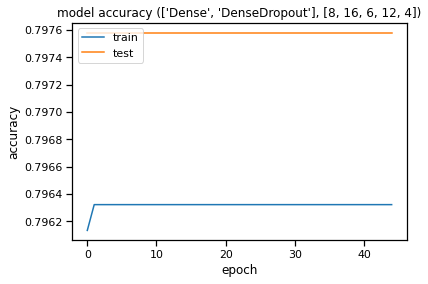

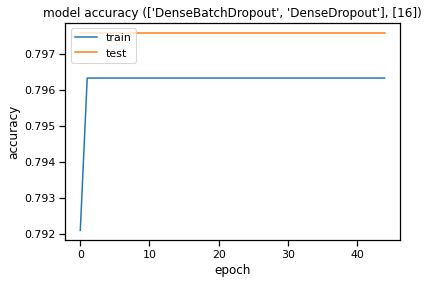

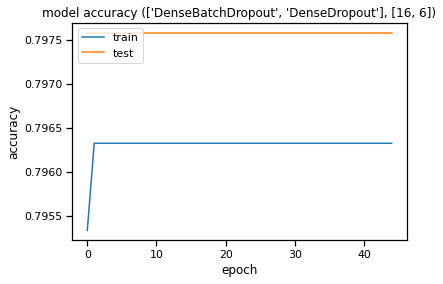

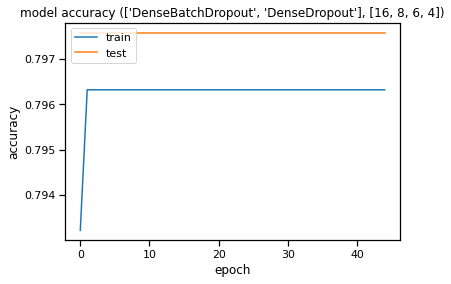

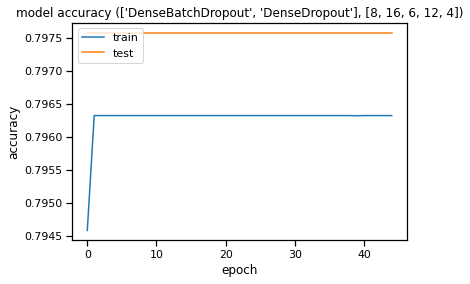

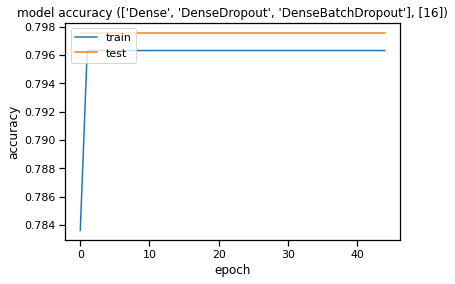

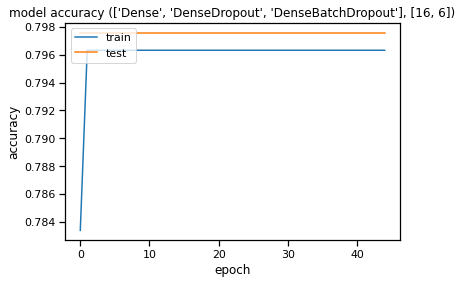

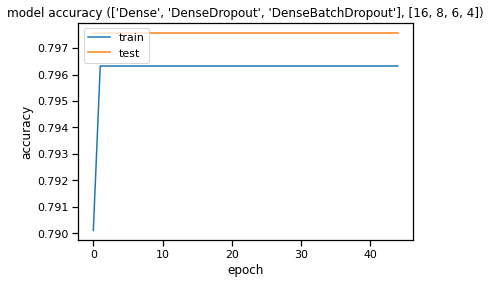

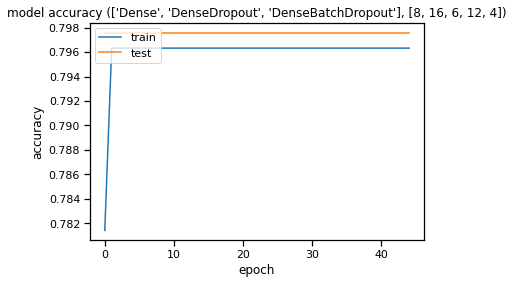

In [90]:
# Generate accuracy graphs
accuracy_graphs(hist, mo_param)

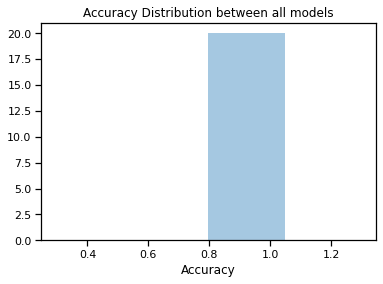

In [91]:
sns.distplot(accur,kde=False)
plt.title('Accuracy Distribution between all models')
plt.xlabel('Accuracy')
plt.show()

In [92]:
filter = get_filter_good_models(norm_df, hist,accur, mo_param)
models, accur, hist, mo_param = filter_model(filter,models,accur,hist,mo_param)

We will keep 20 models
20 [<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93ee605d30>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93eda5bcf8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93ed927908>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93eb73bb38>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93eb518ac8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9401ca84e0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f942ac3fd30>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9404174ac8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93ed9789e8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f941144d0b8>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f94047fe5c0>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f93f52b0c18>, <

The most accurate model is (['Dense'], [16]) with accuracy of 0.798


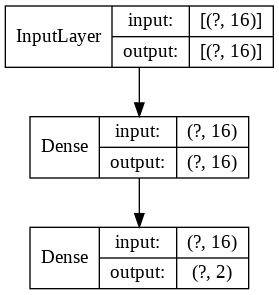

In [93]:
display_best_model(accur, models,mo_param,final_model,"Iteration 3")

### VIII. Conclusion

In conclusion, we can see that the assumption that the more layers a model has or the greater the size of a layer doesnt impact the accuracy of the model. 

Observe the models with the highest accuracy from each iterations of data manipulations.

Iteration 1 Accuracy - 0.765


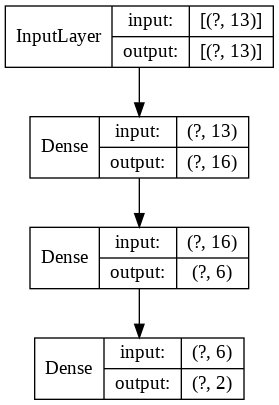

In [124]:
print(final_model[0] + ' Accuracy - 0.765')
plot_model(final_model[1],show_shapes=True,show_layer_names=False)

Iteration 2 Accuracy - 0.769


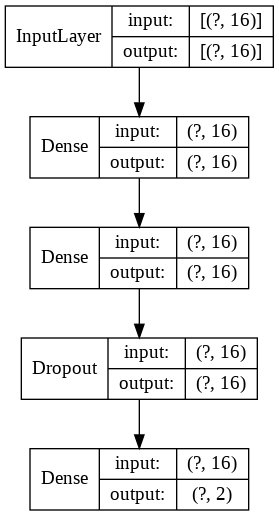

In [123]:
print(final_model[2] + ' Accuracy - 0.769')
plot_model(final_model[3],show_shapes=True,show_layer_names=False)

Iteration 3 Accuracy - 0.798


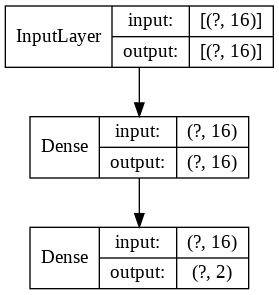

In [125]:
print(final_model[4] + ' Accuracy - 0.798')
plot_model(final_model[5],show_shapes=True,show_layer_names=False)